In [1]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sst.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# List the variable names in the file
variable_names = netcdf_file.variables.keys()

# Print the variable names
print("Variable names in the NetCDF file:")
for var_name in variable_names:
    print(var_name)

# Close the NetCDF file
netcdf_file.close()

Variable names in the NetCDF file:
LON173_180
LAT180_187
LEV1_19
LEV1_19_bnds
TIME
TIME_bnds
TEMP


In [4]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sst.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Access and print data for all variables
for var_name in netcdf_file.variables:
    variable_data = netcdf_file[var_name][:]
    print(f"\nData for '{var_name}' Variable:")
    print(variable_data)

# Close the NetCDF file
netcdf_file.close()


Data for 'LON173_180' Variable:
[86.25 86.75 87.25 87.75 88.25 88.75 89.25 89.75]

Data for 'LAT180_187' Variable:
[14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75]

Data for 'LEV1_19' Variable:
[  5.01  15.07  25.28  35.76  46.61  57.98  70.02  82.92  96.92 112.32
 129.49 148.96 171.4  197.79 229.48 268.46 317.65 381.39 465.91]

Data for 'LEV1_19_bnds' Variable:
[[-2.00000e-02  1.00400e+01]
 [ 1.00400e+01  2.01750e+01]
 [ 2.01750e+01  3.05200e+01]
 [ 3.05200e+01  4.11850e+01]
 [ 4.11850e+01  5.22950e+01]
 [ 5.22950e+01  6.40000e+01]
 [ 6.40000e+01  7.64700e+01]
 [ 7.64700e+01  8.99200e+01]
 [ 8.99200e+01  1.04620e+02]
 [ 1.04620e+02  1.20905e+02]
 [ 1.20905e+02  1.39225e+02]
 [ 1.39225e+02  1.60180e+02]
 [ 1.60180e+02  1.84595e+02]
 [ 1.84595e+02  2.13635e+02]
 [ 2.13635e+02  2.48970e+02]
 [ 2.48970e+02  2.93055e+02]
 [ 2.93055e+02  3.49520e+02]
 [ 3.49520e+02  4.23650e+02]
 [ 4.23650e+02  5.22610e+02]]

Data for 'TIME' Variable:
[683019. 683050. 683078. ... 734061. 734092. 734122.]


In [5]:
import netCDF4 as nc

# Open the NetCDF file
file_path = './sst.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Access and print data for all variables, along with their shapes and lengths
for var_name in netcdf_file.variables:
    variable = netcdf_file[var_name]
    variable_data = variable[:]
    print(f"\nData for '{var_name}' Variable:")
    print("Shape:", variable_data.shape)  # Get the shape (matrix format)
    print("Number of Dimensions:", len(variable.dimensions))
    for dim_name in variable.dimensions:
        dim = netcdf_file.dimensions[dim_name]
        print(f"Length of Dimension '{dim_name}': {len(dim)}")

# Close the NetCDF file
netcdf_file.close()


Data for 'LON173_180' Variable:
Shape: (8,)
Number of Dimensions: 1
Length of Dimension 'LON173_180': 8

Data for 'LAT180_187' Variable:
Shape: (8,)
Number of Dimensions: 1
Length of Dimension 'LAT180_187': 8

Data for 'LEV1_19' Variable:
Shape: (19,)
Number of Dimensions: 1
Length of Dimension 'LEV1_19': 19

Data for 'LEV1_19_bnds' Variable:
Shape: (19, 2)
Number of Dimensions: 2
Length of Dimension 'LEV1_19': 19
Length of Dimension 'bnds': 2

Data for 'TIME' Variable:
Shape: (1680,)
Number of Dimensions: 1
Length of Dimension 'TIME': 1680

Data for 'TIME_bnds' Variable:
Shape: (1680, 2)
Number of Dimensions: 2
Length of Dimension 'TIME': 1680
Length of Dimension 'bnds': 2

Data for 'TEMP' Variable:
Shape: (1680, 19, 8, 8)
Number of Dimensions: 4
Length of Dimension 'TIME': 1680
Length of Dimension 'LEV1_19': 19
Length of Dimension 'LAT180_187': 8
Length of Dimension 'LON173_180': 8


In [6]:
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
file_path = './sst.nc'
netcdf_file = nc.Dataset(file_path, 'r')

# Create a dictionary to store variables
variables_data = {}

# Access and store data for all variables in the dictionary
for var_name in netcdf_file.variables:
    variable_data = netcdf_file[var_name][:]
    variables_data[var_name] = variable_data

# Close the NetCDF file
netcdf_file.close()

In [8]:
import csv

# Define the CSV file name
csv_filename = './train_temp.csv'

# Open the CSV file for writing
with open(csv_filename, mode='w', newline='') as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header row to the CSV file
    csv_writer.writerow(['a', 'c', 'd', 'temp_value'])

    for a in variables_data['TIME']:
        for c in variables_data['LAT180_187']:
            for d in variables_data['LON173_180']:
                # Since 'a', 'b', 'c', and 'd' are values from dimensions, you can use them to index 'TEMP'
                a_index = variables_data['TIME'][:].tolist().index(a)
                b_index = 0
                c_index = variables_data['LAT180_187'][:].tolist().index(c)
                d_index = variables_data['LON173_180'][:].tolist().index(d)

                # Now, you can use the indices to access 'SALT'
                temp_value = variables_data['TEMP'][a_index, b_index, c_index, d_index]
                
                # Write the current values to the CSV file
                csv_writer.writerow([a, c, d, temp_value])

print(f'Data has been saved to {csv_filename}')

Data has been saved to ./train_temp.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('./train_temp.csv')

In [11]:
df.head()

,a,c,d,temp_value
0,683019.0,14.25,86.25,26.131273
1,683019.0,14.25,86.75,26.110088
2,683019.0,14.25,87.25,26.137910
3,683019.0,14.25,87.75,26.186327
4,683019.0,14.25,88.25,26.260979


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107520 entries, 0 to 107519
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           107520 non-null  float64
 1   c           107520 non-null  float64
 2   d           107520 non-null  float64
 3   temp_value  107520 non-null  float64
dtypes: float64(4)
memory usage: 3.3 MB


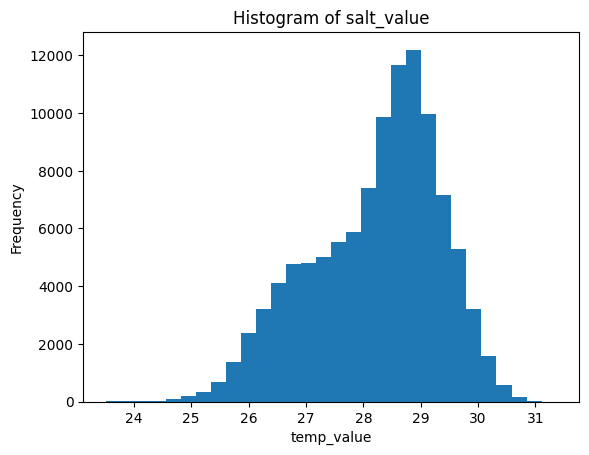

In [14]:
plt.hist(df['temp_value'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('temp_value')
plt.ylabel('Frequency')
plt.title('Histogram of salt_value')
plt.show()

In [15]:
# Perform one-hot encoding for 'c' and 'd' columns
df_encoded = pd.get_dummies(df, columns=['c', 'd'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

          a  temp_value  c_14.25  c_14.75  c_15.25  c_15.75  c_16.25  c_16.75  \
0  683019.0   26.131273     True    False    False    False    False    False   
1  683019.0   26.110088     True    False    False    False    False    False   
2  683019.0   26.137910     True    False    False    False    False    False   
3  683019.0   26.186327     True    False    False    False    False    False   
4  683019.0   26.260979     True    False    False    False    False    False   

   c_17.25  c_17.75  d_86.25  d_86.75  d_87.25  d_87.75  d_88.25  d_88.75  \
0    False    False     True    False    False    False    False    False   
1    False    False    False     True    False    False    False    False   
2    False    False    False    False     True    False    False    False   
3    False    False    False    False    False     True    False    False   
4    False    False    False    False    False    False     True    False   

   d_89.25  d_89.75  
0    False    False  
1    F

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107520 entries, 0 to 107519
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           107520 non-null  float64
 1   temp_value  107520 non-null  float64
 2   c_14.25     107520 non-null  bool   
 3   c_14.75     107520 non-null  bool   
 4   c_15.25     107520 non-null  bool   
 5   c_15.75     107520 non-null  bool   
 6   c_16.25     107520 non-null  bool   
 7   c_16.75     107520 non-null  bool   
 8   c_17.25     107520 non-null  bool   
 9   c_17.75     107520 non-null  bool   
 10  d_86.25     107520 non-null  bool   
 11  d_86.75     107520 non-null  bool   
 12  d_87.25     107520 non-null  bool   
 13  d_87.75     107520 non-null  bool   
 14  d_88.25     107520 non-null  bool   
 15  d_88.75     107520 non-null  bool   
 16  d_89.25     107520 non-null  bool   
 17  d_89.75     107520 non-null  bool   
dtypes: bool(16), float64(2)
memory usage: 3.3 MB

In [17]:
df_test = pd.read_csv('./test.csv')

In [18]:
print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3840 non-null   int64  
 1   c       3840 non-null   float64
 2   d       3840 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 90.1 KB
None
        a      c      d
0  734153  14.25  86.25
1  734153  14.25  86.75
2  734153  14.25  87.25
3  734153  14.25  87.75
4  734153  14.25  88.25


In [19]:
df_encoded_test = pd.get_dummies(df_test, columns=['c', 'd'])

In [20]:
df_encoded_test

,a,c_14.25,c_14.75,c_15.25,c_15.75,c_16.25,c_16.75,c_17.25,c_17.75,d_86.25,d_86.75,d_87.25,d_87.75,d_88.25,d_88.75,d_89.25,d_89.75
0,734153,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,734153,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,734153,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,734153,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,734153,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,735948,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3836,735948,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3837,735948,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3838,735948,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [21]:
X = df_encoded.drop('temp_value', axis=1)  # Features
y = df_encoded['temp_value']  # Target variable

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model_linear.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred, y_test)

R-squared (R2): 0.023317585625588944
Mean Absolute Error (MAE): 0.9075364486447286
Mean Squared Error (MSE): 1.2276141072664342
Root Mean Squared Error (RMSE): 1.1079774849997783
Explained Variance Score: 0.023337550518973904


In [26]:
y_pred_test = model_linear.predict(df_encoded_test)

In [27]:
y_pred_test

array([28.5907615 , 28.59545726, 28.58792092, ..., 28.45553577,
       28.43439163, 28.4046895 ])

In [28]:
# Calculate the number of data points in each part
part_size = len(y_pred_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

Year 2011 Average: 28.50462500029091
Year 2012 Average: 28.508691493034732
Year 2013 Average: 28.51275057531342
Year 2014 Average: 28.516807804975826
Year 2015 Average: 28.52086503463823


In [29]:
part_size_train = len(y) // 140

# Initialize a list to store the averages of each part
part_averages_train = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(140):
    start_idx = i * part_size_train
    end_idx = (i + 1) * part_size_train
    part = y[start_idx:end_idx]
    average = np.mean(part)
    part_averages_train.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages_train):
    print(f"Year {1871 + i} Average: {average}")

Year 1871 Average: 27.69697428645834
Year 1872 Average: 28.546173582031248
Year 1873 Average: 28.52752283072917
Year 1874 Average: 28.251528518229165
Year 1875 Average: 28.545345699218753
Year 1876 Average: 28.467270330729168
Year 1877 Average: 28.650061829427084
Year 1878 Average: 29.160387994791666
Year 1879 Average: 28.551269957031252
Year 1880 Average: 28.241942136718748
Year 1881 Average: 28.001027427083333
Year 1882 Average: 27.983941239583334
Year 1883 Average: 28.165859037760416
Year 1884 Average: 27.6629552734375
Year 1885 Average: 27.58503826953125
Year 1886 Average: 28.32607091796875
Year 1887 Average: 27.794099118489584
Year 1888 Average: 27.608288033854166
Year 1889 Average: 28.663791423177084
Year 1890 Average: 28.335827230468748
Year 1891 Average: 28.21679355078125
Year 1892 Average: 28.167932985677083
Year 1893 Average: 28.263587980468753
Year 1894 Average: 28.132850248697917
Year 1895 Average: 28.028396648437496
Year 1896 Average: 28.32928232291667
Year 1897 Average: 2

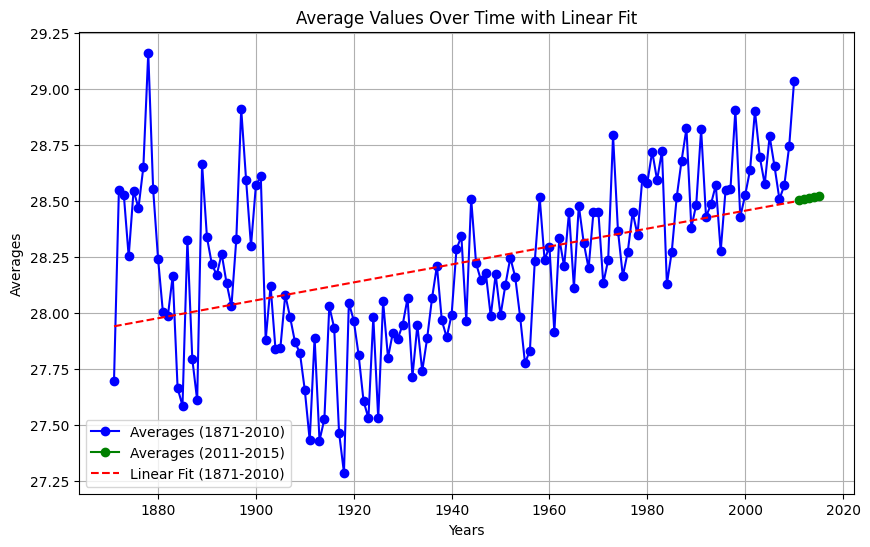

In [31]:
import matplotlib.pyplot as plt
import numpy as np

years_train = list(range(1871, 2011))
years_test = list(range(2011, 2016))

# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Perform linear regression on the 'years_train' and 'part_averages_train' data
linear_fit = np.polyfit(years_train, part_averages_train, 1)
linear_fit_fn = np.poly1d(linear_fit)

# Plot the linear regression line
plt.plot(years_train, linear_fit_fn(years_train), color='red', linestyle='--', label='Linear Fit (1871-2010)')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time with Linear Fit')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

# Create a PolynomialFeatures transformer to generate polynomial features
degree = 2  # You can change the degree as needed
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train a linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = model_poly.predict(X_test_poly)

# Define a function to evaluate the regression model
def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred_poly, y_test)

R-squared (R2): 0.0464693669861429
Mean Absolute Error (MAE): 0.9014531524141831
Mean Squared Error (MSE): 1.198514112233997
Root Mean Squared Error (RMSE): 1.094766693060214
Explained Variance Score: 0.04647896511911309


In [33]:
y_pred_test = model_poly.predict(poly.transform(df_encoded_test))

In [34]:
# Calculate the number of data points in each part
part_size = len(y_pred_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

Year 2011 Average: 28.938527421480682
Year 2012 Average: 28.96122034671995
Year 2013 Average: 28.9841347009873
Year 2014 Average: 29.007301116056368
Year 2015 Average: 29.03072993567839


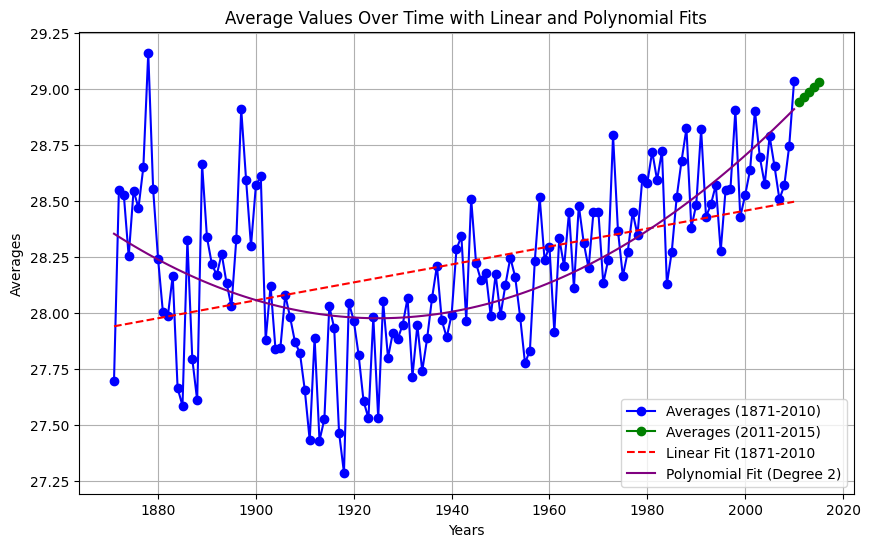

In [38]:
# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Perform linear regression on the 'years_train' and 'part_averages_train' data
linear_fit = np.polyfit(years_train, part_averages_train, 1)
linear_fit_fn = np.poly1d(linear_fit)

# Plot the linear regression line
plt.plot(years_train, linear_fit_fn(years_train), color='red', linestyle='--', label='Linear Fit (1871-2010')

# Perform polynomial regression on the 'years_train' and 'part_averages_train' data
degree = 2  # You can change the degree as needed
poly_fit = np.polyfit(years_train, part_averages_train, degree)
poly_fit_fn = np.poly1d(poly_fit)

# Plot the polynomial curve
years_smooth = np.linspace(min(years_train), max(years_train), 100)  # Smooth curve for better visualization
plt.plot(years_smooth, poly_fit_fn(years_smooth), color='purple', linestyle='-', label=f'Polynomial Fit (Degree {degree})')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time with Linear and Polynomial Fits')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create and train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Define a function to evaluate the regression model
def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred_rf, y_test)

y_pred_rf_test = rf_model.predict(df_encoded_test)

# Calculate the number of data points in each part
part_size = len(y_pred_rf_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_rf_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")

R-squared (R2): 0.9803761317949837
Mean Absolute Error (MAE): 0.10483211668557776
Mean Squared Error (MSE): 0.02466568159010602
Root Mean Squared Error (RMSE): 0.15705311709770686
Explained Variance Score: 0.9803765998829923
Year 2011 Average: 28.037736461406258
Year 2012 Average: 28.037736461406258
Year 2013 Average: 28.037736461406258
Year 2014 Average: 28.037736461406258
Year 2015 Average: 28.037736461406258


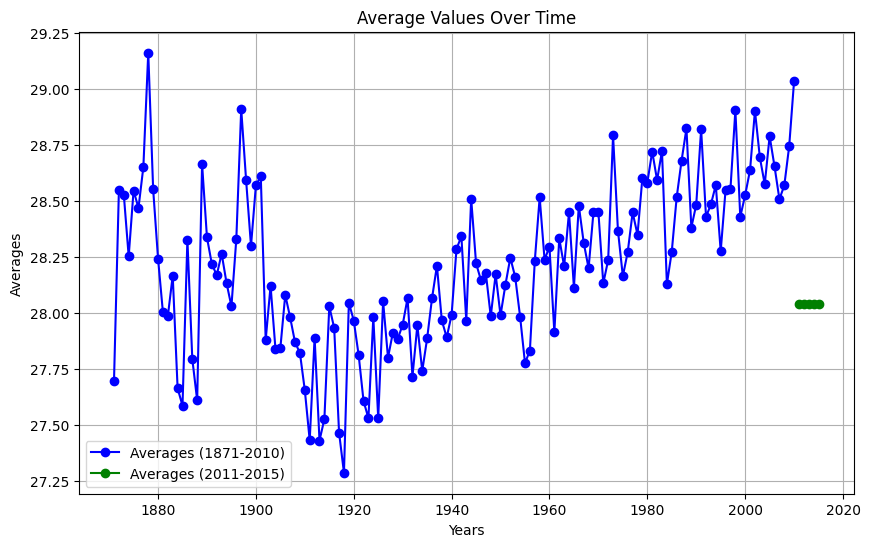

In [40]:
import matplotlib.pyplot as plt

# Assuming you have 'part_averages_train' and 'part_averages' as lists of average values
# from 1871 to 2010 and from 2011 to 2015 respectively

# Years for each part
years_train = list(range(1871, 2011))
years_test = list(range(2011, 2016))

# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [43]:
for i in y_pred_rf_test:
    print(i)

28.075158599999995
28.08198763000004
28.103363919999993
28.121657729999992
28.13120530000003
28.15328025999999
28.228701200000028
28.25792603999998
28.08050567
28.09185356000004
28.129710290000045
28.160116920000032
28.15768263000004
28.161843380000033
28.177299230000045
28.23683763000003
28.092377880000004
28.103165400000044
28.151431070000026
28.187883950000057
28.184789790000004
28.178065589999978
28.187461240000058
28.255478190000012
28.090951609999994
28.096276849999995
28.146254690000028
28.185281210000003
28.17854881
28.17310687999999
28.165349040000052
28.256516360000006
28.047327019999997
28.067025380000022
28.119427010000013
28.131768500000025
28.117928340000002
28.11474517999997
28.13407008000002
28.146049319999964
27.972431599999982
27.98954435000004
27.964114669999994
27.958203999999974
27.91160520999998
27.93310532000001
27.965581329999992
28.025314690000002
27.874403039999965
27.821575519999975
27.842903919999966
27.800864149999967
27.76067531
27.787593879999953
27.82249

In [44]:
len(y_pred_rf_test)

3840

## Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Create and train a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Define a function to evaluate the regression model
def evaluate_regression(y_pred, y_test):
    # R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Display the metrics
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Explained Variance Score: {evs}")

# Usage
evaluate_regression(y_pred_gb, y_test)

y_pred_gb_test = gb_model.predict(df_encoded_test)

# Calculate the number of data points in each part
part_size = len(y_pred_gb_test) // 5

# Initialize a list to store the averages of each part
part_averages = []

# Split y_pred_test into five parts and calculate the average of each part
for i in range(5):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size
    part = y_pred_gb_test[start_idx:end_idx]
    average = np.mean(part)
    part_averages.append(average)

# Print the averages of each part
for i, average in enumerate(part_averages):
    print(f"Year {2011 + i} Average: {average}")


R-squared (R2): 0.20127085461896554
Mean Absolute Error (MAE): 0.8183089121237601
Mean Squared Error (MSE): 1.0039406385571863
Root Mean Squared Error (RMSE): 1.0019683820147152
Explained Variance Score: 0.20127222021863234
Year 2011 Average: 28.522490209361496
Year 2012 Average: 28.522490209361496
Year 2013 Average: 28.522490209361496
Year 2014 Average: 28.522490209361496
Year 2015 Average: 28.522490209361496


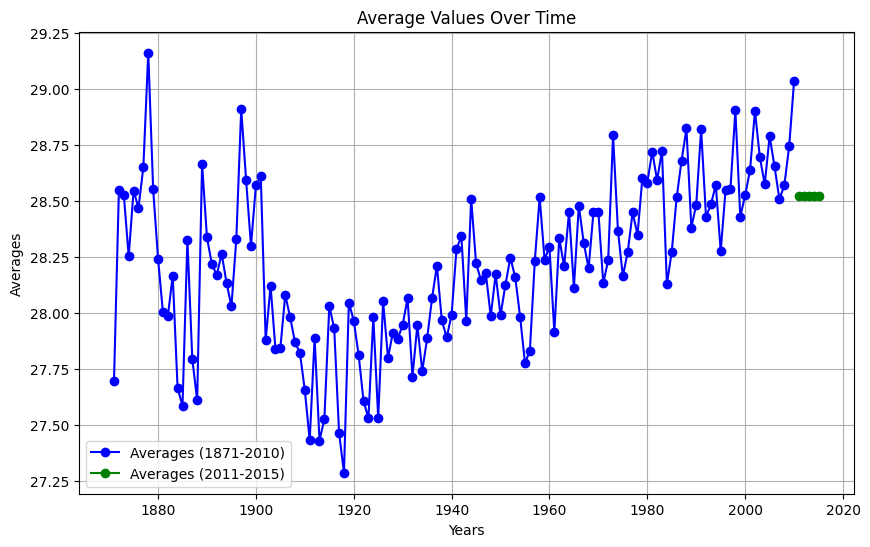

In [47]:
import matplotlib.pyplot as plt

# Assuming you have 'part_averages_train' and 'part_averages' as lists of average values
# from 1871 to 2010 and from 2011 to 2015, respectively

# Years for each part
years_train = list(range(1871, 2011))
years_test = list(range(2011, 2016))

# Plot the line graph for both parts
plt.figure(figsize=(10, 6))
plt.plot(years_train, part_averages_train, label='Averages (1871-2010)', marker='o', linestyle='-', color='blue')
plt.plot(years_test, part_averages, label='Averages (2011-2015)', marker='o', linestyle='-', color='green')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Averages')
plt.title('Average Values Over Time')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [48]:
y_pred_gb_test

array([28.59056882, 28.58981909, 28.5862627 , ..., 28.37910392,
       28.35180104, 28.37040832])

In [50]:
for i in y_pred_gb_test:
    print(i)

28.590568821574863
28.58981908898615
28.586262697578633
28.582009506160944
28.582009506160944
28.582009506160944
28.55470663119884
28.510744643027227
28.58034869678991
28.579598964201196
28.57604257279368
28.57178938137599
28.57178938137599
28.57178938137599
28.544486506413886
28.500524518242273
28.58034869678991
28.579598964201196
28.57604257279368
28.57178938137599
28.57178938137599
28.57178938137599
28.544486506413886
28.500524518242273
28.58034869678991
28.579598964201196
28.57604257279368
28.57178938137599
28.57178938137599
28.57178938137599
28.544486506413886
28.500524518242273
28.58034869678991
28.579598964201196
28.57604257279368
28.57178938137599
28.57178938137599
28.57178938137599
28.544486506413886
28.500524518242273
28.58034869678991
28.579598964201196
28.57604257279368
28.57178938137599
28.57178938137599
28.57178938137599
28.544486506413886
28.500524518242273
28.43780193608834
28.43705220349963
28.43349581209211
28.429242620674422
28.429242620674422
28.429242620674422
28.4